In [3]:
import pandas as pd
import numpy as np
import math
import time
import random
import re
from PIL import Image
import matplotlib.pyplot as plt
from cvxopt import matrix
from cvxopt import solvers
from libsvm.svmutil import *
from pathlib import Path
from sklearn.svm import *

In [4]:
class0 = list()
path0 = 'svm/train/1/'
for image in Path(path0).glob('*.jpg'):
    image_resized = np.array(Image.open(image).resize((16, 16))).flatten()/255
    class0.append(image_resized)
label0 = np.array(class0) 

class1 = list()
path1 = 'svm/train/2/'
for image in Path(path1).glob('*.jpg'):
    image_resized = np.array(Image.open(image).resize((16, 16))).flatten()/255
    class1.append(image_resized)
label1 = np.array(class1) 

In [5]:
y0 = np.full((2380, 1), fill_value=-1, dtype='double')
y1 = np.ones((2380, 1), dtype='double')
y = np.concatenate((y0, y1))

x = np.concatenate((label0, label1))

In [6]:
def accuracy(y_pred, vy):
    count = 0
    for i in range(0, vy.shape[0]):
        count = count+1 if(vy[i][0]==y_pred[i]) else count
    return count/len(y_pred)

In [7]:
def svm_cross_validation(c):
    accuracies = []
    for i in range(0, 5):
        subset_x = np.delete(x, slice(i*952, (i+1)*952), 0)
        subset_y = np.delete(y, slice(i*952, (i+1)*952), 0)
        vx = x[i*952 : (i+1)*952]
        vy = y[i*952 : (i+1)*952]

        guassian_model = SVC(kernel='rbf', C=c, gamma=0.001)
        guassian_model.fit(subset_x, subset_y)
        accuracies.append(accuracy(guassian_model.predict(vx), vy))

    return np.mean(np.array(accuracies))

In [8]:
c_accuracy_cross_validation = []
c_accuracy_cross_validation.append(svm_cross_validation(0.00001))
c_accuracy_cross_validation.append(svm_cross_validation(0.001))
c_accuracy_cross_validation.append(svm_cross_validation(1.0))
c_accuracy_cross_validation.append(svm_cross_validation(5.0))
c_accuracy_cross_validation.append(svm_cross_validation(10.0))

print(c_accuracy_cross_validation)

c:\Users\samra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\samra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\samra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\samra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataC

[0.18256302521008402, 0.18256302521008402, 0.9304621848739496, 0.9434873949579832, 0.9441176470588235]


In [9]:
def svm_validation(vx, vy, c):
    guassian_model = SVC(kernel='rbf', C=c, gamma=0.001)
    guassian_model.fit(x, y)
    return accuracy(guassian_model.predict(vx), vy)

In [10]:
vclass0 = list()
vpath0 = 'svm/val/1/'
for image in Path(vpath0).glob('*.jpg'):
    image_resized = np.array(Image.open(image).resize((16, 16))).flatten()/255
    vclass0.append(image_resized)
vlabel0 = np.array(vclass0) 

vclass1 = list()
vpath1 = 'svm/val/2/'
for image in Path(vpath1).glob('*.jpg'):
    image_resized = np.array(Image.open(image).resize((16, 16))).flatten()/255
    vclass1.append(image_resized)
vlabel1 = np.array(vclass1)

vy0 = np.full((vlabel0.shape[0], 1), fill_value=-1, dtype='double')
vy1 = np.ones((vlabel1.shape[0], 1), dtype='double')
vy = np.concatenate((vy0, vy1))

vx = np.concatenate((vlabel0, vlabel1))

c_accuracy_validation = []
c_accuracy_validation.append(svm_validation(vx, vy, 0.00001))
c_accuracy_validation.append(svm_validation(vx, vy, 0.001))
c_accuracy_validation.append(svm_validation(vx, vy, 1.0))
c_accuracy_validation.append(svm_validation(vx, vy, 5.0))
c_accuracy_validation.append(svm_validation(vx, vy, 10.0))
print(c_accuracy_validation)

c:\Users\samra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\samra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\samra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\samra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataC

[0.885, 0.885, 0.9375, 0.9475, 0.955]


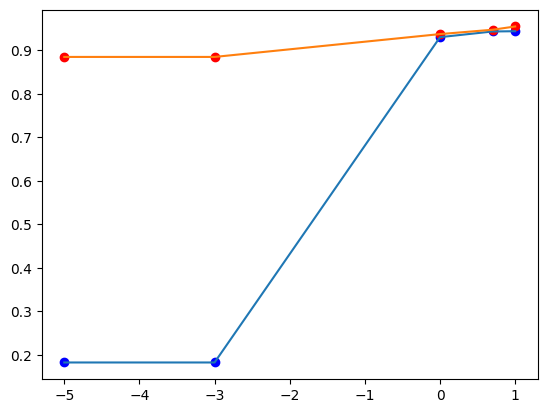

In [11]:
plt.plot([math.log(0.00001, 10), math.log(0.001, 10), math.log(1.0, 10), math.log(5.0, 10), math.log(10.0, 10)],c_accuracy_cross_validation, [math.log(0.00001, 10), math.log(0.001, 10), math.log(1.0, 10), math.log(5.0, 10), math.log(10.0, 10)],c_accuracy_validation)
plt.scatter([math.log(0.00001, 10), math.log(0.001, 10), math.log(1.0, 10), math.log(5.0, 10), math.log(10.0, 10)], c_accuracy_cross_validation, c='b')
plt.scatter([math.log(0.00001, 10), math.log(0.001, 10), math.log(1.0, 10), math.log(5.0, 10), math.log(10.0, 10)], c_accuracy_validation, c='r')
plt.show()